References taken from https://github.com/collinprather/Logistic-Regression-from-scratch

In [1]:
import pandas as pd
import numpy as np

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
from sklearn import datasets

In [244]:
iris = datasets.load_iris()

In [245]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [246]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [247]:
df = pd.DataFrame(data = iris['data'],columns = iris['feature_names'])

In [248]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [249]:
df['target'] = iris['target']

In [250]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [251]:
df['target'] = (df['target']!=0)*1

In [252]:
df['target'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [253]:
X = df[['sepal length (cm)','sepal width (cm)']]
y = df['target']
lr = 0.001
num_iter = 100000

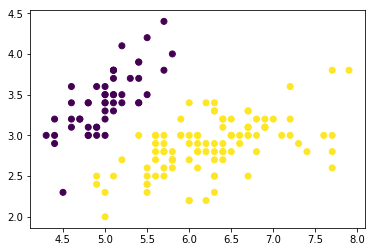

In [254]:
plt.scatter(X['sepal length (cm)'],X['sepal width (cm)'],c=y)

In [255]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [256]:
X = add_intercept(X)
print(X)

[[1.  5.1 3.5]
 [1.  4.9 3. ]
 [1.  4.7 3.2]
 [1.  4.6 3.1]
 [1.  5.  3.6]
 [1.  5.4 3.9]
 [1.  4.6 3.4]
 [1.  5.  3.4]
 [1.  4.4 2.9]
 [1.  4.9 3.1]
 [1.  5.4 3.7]
 [1.  4.8 3.4]
 [1.  4.8 3. ]
 [1.  4.3 3. ]
 [1.  5.8 4. ]
 [1.  5.7 4.4]
 [1.  5.4 3.9]
 [1.  5.1 3.5]
 [1.  5.7 3.8]
 [1.  5.1 3.8]
 [1.  5.4 3.4]
 [1.  5.1 3.7]
 [1.  4.6 3.6]
 [1.  5.1 3.3]
 [1.  4.8 3.4]
 [1.  5.  3. ]
 [1.  5.  3.4]
 [1.  5.2 3.5]
 [1.  5.2 3.4]
 [1.  4.7 3.2]
 [1.  4.8 3.1]
 [1.  5.4 3.4]
 [1.  5.2 4.1]
 [1.  5.5 4.2]
 [1.  4.9 3.1]
 [1.  5.  3.2]
 [1.  5.5 3.5]
 [1.  4.9 3.6]
 [1.  4.4 3. ]
 [1.  5.1 3.4]
 [1.  5.  3.5]
 [1.  4.5 2.3]
 [1.  4.4 3.2]
 [1.  5.  3.5]
 [1.  5.1 3.8]
 [1.  4.8 3. ]
 [1.  5.1 3.8]
 [1.  4.6 3.2]
 [1.  5.3 3.7]
 [1.  5.  3.3]
 [1.  7.  3.2]
 [1.  6.4 3.2]
 [1.  6.9 3.1]
 [1.  5.5 2.3]
 [1.  6.5 2.8]
 [1.  5.7 2.8]
 [1.  6.3 3.3]
 [1.  4.9 2.4]
 [1.  6.6 2.9]
 [1.  5.2 2.7]
 [1.  5.  2. ]
 [1.  5.9 3. ]
 [1.  6.  2.2]
 [1.  6.1 2.9]
 [1.  5.6 2.9]
 [1.  6.7 3.1]
 [1.  5.6 

In [257]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [258]:
a = np.arange(-8,8,0.01)
b = sigmoid(a)

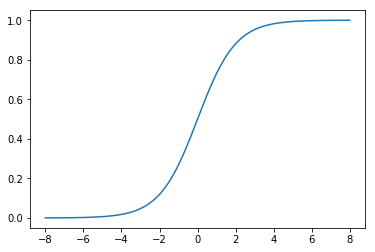

In [259]:
plt.plot(a,b)

In [260]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

If y=1 the cost function shall return -np.log(h)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


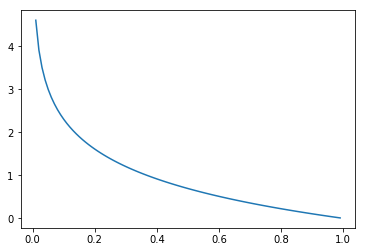

In [261]:
numbers = np.arange(0,1,step=0.01)
plt.plot(numbers,np.log(1/numbers))

If y=0 the cost function shall return -np.log(1-h)

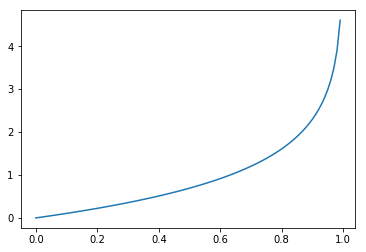

In [262]:
numbers = np.arange(0,1,step=0.01)
plt.plot(numbers,np.log(1/(1-numbers)))

### Gradient Descent 

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

In [263]:
print(X.T)

[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. ]
 [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.

In [264]:
def gradient_descent(X, y):   
    theta = np.zeros(X.shape[1]) #Here a list named theta is initialised with all values as zero and of size 1 x 3
    descent = dict() #An empty dictionary is initialised to store the 'cost' calculated in every iteration
        
    for i in range(num_iter): 
        z = np.dot(X, theta) # z = X.'Theta'  This will act as the input for our sigmoid function
        h = sigmoid(z) # we apply the sigmoid function to the value of z obtained
        gradient = np.dot(X.T, (h - y)) / y.size # We calculate the gradient by multiplying the transpose of X and the difference between the actual and predicted value and dividing the whole by the size of the dataset
        theta -= lr * gradient #This step accomplishes the main aim of this function. It TWEAKS the value of THETA accordingly.
            
        z = np.dot(X,theta) # Here we calculate the new value of z using the new value of theta
        h = sigmoid(z) #And so in calculate the value of h 
        loss = cost(h, y) #And apply the cost function to it to calculate the loss
                
        if i % 10000 == 0:
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {theta} \t')
    return descent

In [265]:
descent_dict = gradient_descent(X,y)

cost: 0.691409922687723 	 weights: [0.00016667 0.001253   0.000386  ] 	
cost: 0.3162322390162532 	 weights: [-0.17653292  0.93185727 -1.41942885] 	
cost: 0.2180337484966766 	 weights: [-0.29961481  1.42167283 -2.26293521] 	
cost: 0.17132694595823553 	 weights: [-0.39262294  1.76402265 -2.84398396] 	
cost: 0.14399340916645492 	 weights: [-0.4693403   2.02765352 -3.28753534] 	
cost: 0.12595814803695454 	 weights: [-0.53581009  2.2426755  -3.64696103] 	
cost: 0.11310557933890834 	 weights: [-0.59521158  2.42471273 -3.94962625] 	
cost: 0.10344473990531335 	 weights: [-0.6494254   2.58287809 -4.21137732] 	
cost: 0.09589411679282361 	 weights: [-0.69965807  2.7229452  -4.44220431] 	
cost: 0.08981463329264795 	 weights: [-0.74673111  2.84880271 -4.64881086] 	


Text(0, 0.5, 'Cost')

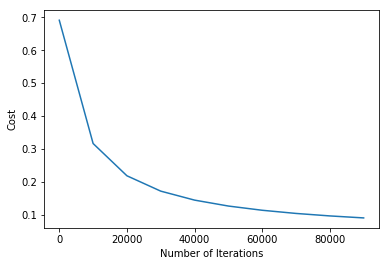

In [266]:
x = descent_dict.keys()
y_ = descent_dict.values()

plt.plot(x, y_)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')

In [267]:
final_weights = np.array([-0.74673111,2.84880271,-4.64881086])

In [268]:
def predict_prob(X, theta):
    final_pred = sigmoid(np.dot(X, theta))
    return final_pred.round()

In [294]:
predictions = predict_prob(X, final_weights)
y = df['target'].values
print(predictions)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [296]:
def accuracy(list_):
    true_values = 0
    for i in range(len(list_)):
        if list_[i]==0:
            true_values = true_values+1
    return (true_values/len(list_))

In [297]:
diff = predictions-y
print(diff)
print(accuracy(diff))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.9933333333333333
